<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2023S1/blob/main/ML_Regressao_aplicada_serie_nao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

 # **Regressão Linear**
 ---
 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Caso: **Estimando a emissão de CO2 no Mundo** 

Neste Lab você vai empregar modelos de regressão simples e múltipla para estimar as emissões de CO2 a partir da série histórica de emissões de gases.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')
df.head()

,Date,CO2
0,1959-01-01,315.42
1,1959-02-01,316.31
2,1959-03-01,316.50
3,1959-04-01,317.56
4,1959-05-01,318.13


# Exercício. Estime a tendência das emissões para mais 36 meses 

Vamos empregar uma regressão linear. Para isso vamos criar uma coluna de *time-steps*, ou períodos, pois não podemos empregar datas diretamente. 

$$ \hat y = a_0 + a_1 \text{time} $$

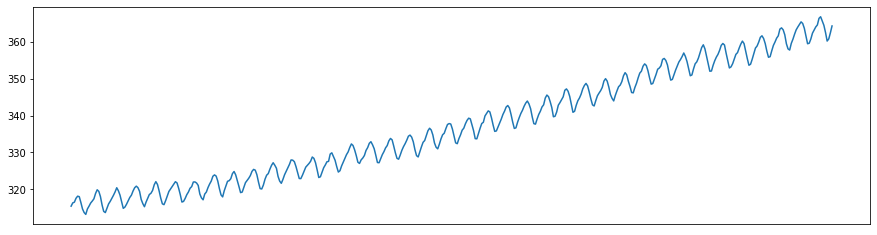

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df.Date, df.CO2)
plt.xticks([])
plt.show()

In [ ]:
df['time'] = np.arange(len(df))
df.head()

,Date,CO2,time
0,1959-01-01,315.42,0
1,1959-02-01,316.31,1
2,1959-03-01,316.50,2
3,1959-04-01,317.56,3
4,1959-05-01,318.13,4


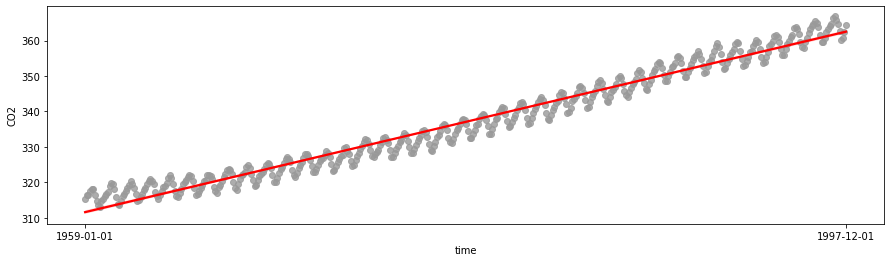

In [ ]:
plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='red'))

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df['Date'][0], df['Date'][len(df)-1] ])
plt.show()

In [ ]:
model = sm.ols(formula='CO2 ~ time', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:47:35   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    311.6118      0.242   1289.503      0.0

In [ ]:
new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 36)

new_times['prediction'] = result.predict(new_times)
new_times.head()

,time,prediction
0,468,362.604190
1,469,362.713148
2,470,362.822106
3,471,362.931064
4,472,363.040022


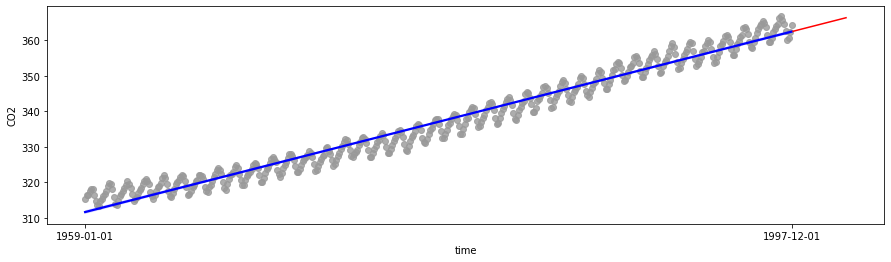

In [ ]:
plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='blue'))

sns.lineplot(x='time', y='prediction', data=new_times, color='red')

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df['Date'][0], df['Date'][len(df)-1] ])
plt.show()

# Exercício. Estime o valor de emissões da próxima emissão com base nas emissões anteriores

Também podemos empregar um modelo que emprega não o tempo, mas a dependência de emissões anteriores para obter uma melhor aproximação do valor das emissões no tempo $t$:

$$ \hat y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2} + ... + a_2 y_{t-n} $$

Chamamos esse intervalo de $n$-lags.




In [ ]:
df['lag1'] = df.CO2.shift()
df.head()

,Date,CO2,time,lag1
0,1959-01-01,315.42,0,NaN
1,1959-02-01,316.31,1,315.42
2,1959-03-01,316.50,2,316.31
3,1959-04-01,317.56,3,316.50
4,1959-05-01,318.13,4,317.56


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Date,CO2,time,lag1
0,1959-02-01,316.31,1,315.42
1,1959-03-01,316.50,2,316.31
2,1959-04-01,317.56,3,316.50
3,1959-05-01,318.13,4,317.56
4,1959-06-01,318.00,5,318.13


In [ ]:
model = sm.ols(formula='CO2 ~ lag1', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 7.096e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:27:20   Log-Likelihood:                -749.66
No. Observations:                 467   AIC:                             1503.
Df Residuals:                     465   BIC:                             1512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7556      1.264      0.598      0.5

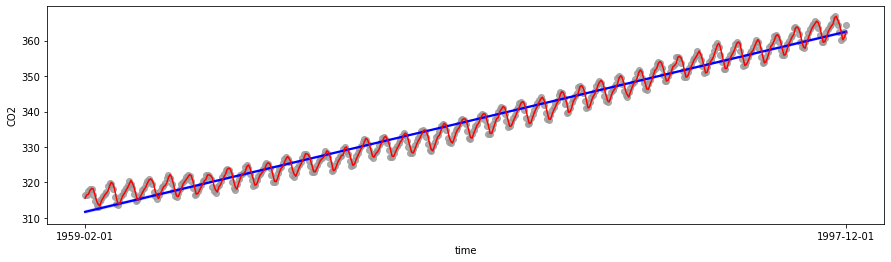

In [ ]:
y_pred = result.predict()

plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='blue'))

sns.lineplot(x=df.time, y=y_pred, color='red')

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df['Date'][0], df['Date'][len(df)-1] ])
plt.show()

In [ ]:
new_lag = pd.DataFrame()
new_lag['lag1'] = df['lag1'].iloc[[-1]]

print(new_lag)
result.predict(new_lag)


       lag1
466  362.49


466    362.545516
dtype: float64

# Exercício. Faça você agora para $2$-lags

Acima você fez o modelo,

$$ \hat y_t = a_0 + a_1 y_{t-1} $$

Agora você vai fazer o modelo, 

$$ \hat y_t = a_0 + a_1 y_{t-1} + a_2 y_{t-2} $$


In [ ]:
df['lag2'] = df.lag1.shift()
df.head()

,Date,CO2,time,lag1,lag2
0,1959-02-01,316.31,1,315.42,NaN
1,1959-03-01,316.50,2,316.31,315.42
2,1959-04-01,317.56,3,316.50,316.31
3,1959-05-01,318.13,4,317.56,316.50
4,1959-06-01,318.00,5,318.13,317.56


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Date,CO2,time,lag1,lag2
0,1959-03-01,316.50,2,316.31,315.42
1,1959-04-01,317.56,3,316.50,316.31
2,1959-05-01,318.13,4,317.56,316.50
3,1959-06-01,318.00,5,318.13,317.56
4,1959-07-01,316.39,6,318.00,318.13


In [ ]:
model = sm.ols(formula='CO2 ~ lag1 + lag2', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 7.093e+04
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:27:21   Log-Likelihood:                -585.95
No. Observations:                 466   AIC:                             1178.
Df Residuals:                     463   BIC:                             1190.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6260      0.897      1.813      0.0

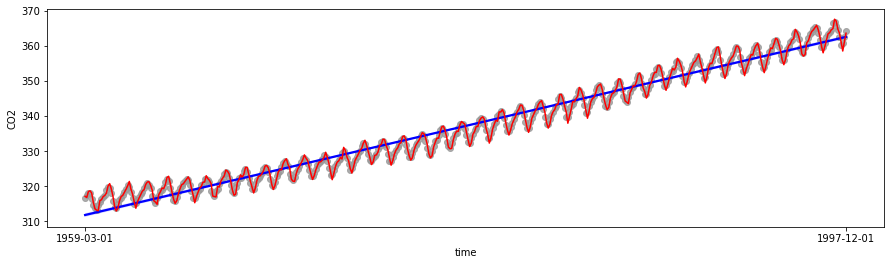

In [ ]:
y_pred = result.predict()

plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='blue'))

sns.lineplot(x=df.time, y=y_pred, color='red')

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df['Date'][0], df['Date'][len(df)-1] ])
plt.show()

In [ ]:
new_lag = pd.DataFrame()
new_lag['lag1'] = df['lag1'].iloc[[-1]]
new_lag['lag2'] = df['lag2'].iloc[[-1]]

print(new_lag)
result.predict(new_lag)


       lag1    lag2
465  362.49  360.83


465    363.580372
dtype: float64

# Caso: **Estimando a emissão de gases CO2 de veículos** 

Neste Lab você vai empregar modelos de regressão simples e múltipla para estimar as emissões de CO2 de veículos a partir de suas características como consumo de combustível, marca ou tamanho do motor.

Dados: https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv

In [ ]:
df = pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exercício. Faça um gráfico de dispersão entre todos os pares de variáveis

Isso irá permitir você visualizar as relações de cada par de variáveis dos dados.

**Dica**: Empregue `sns.pairplot(df)`



[]

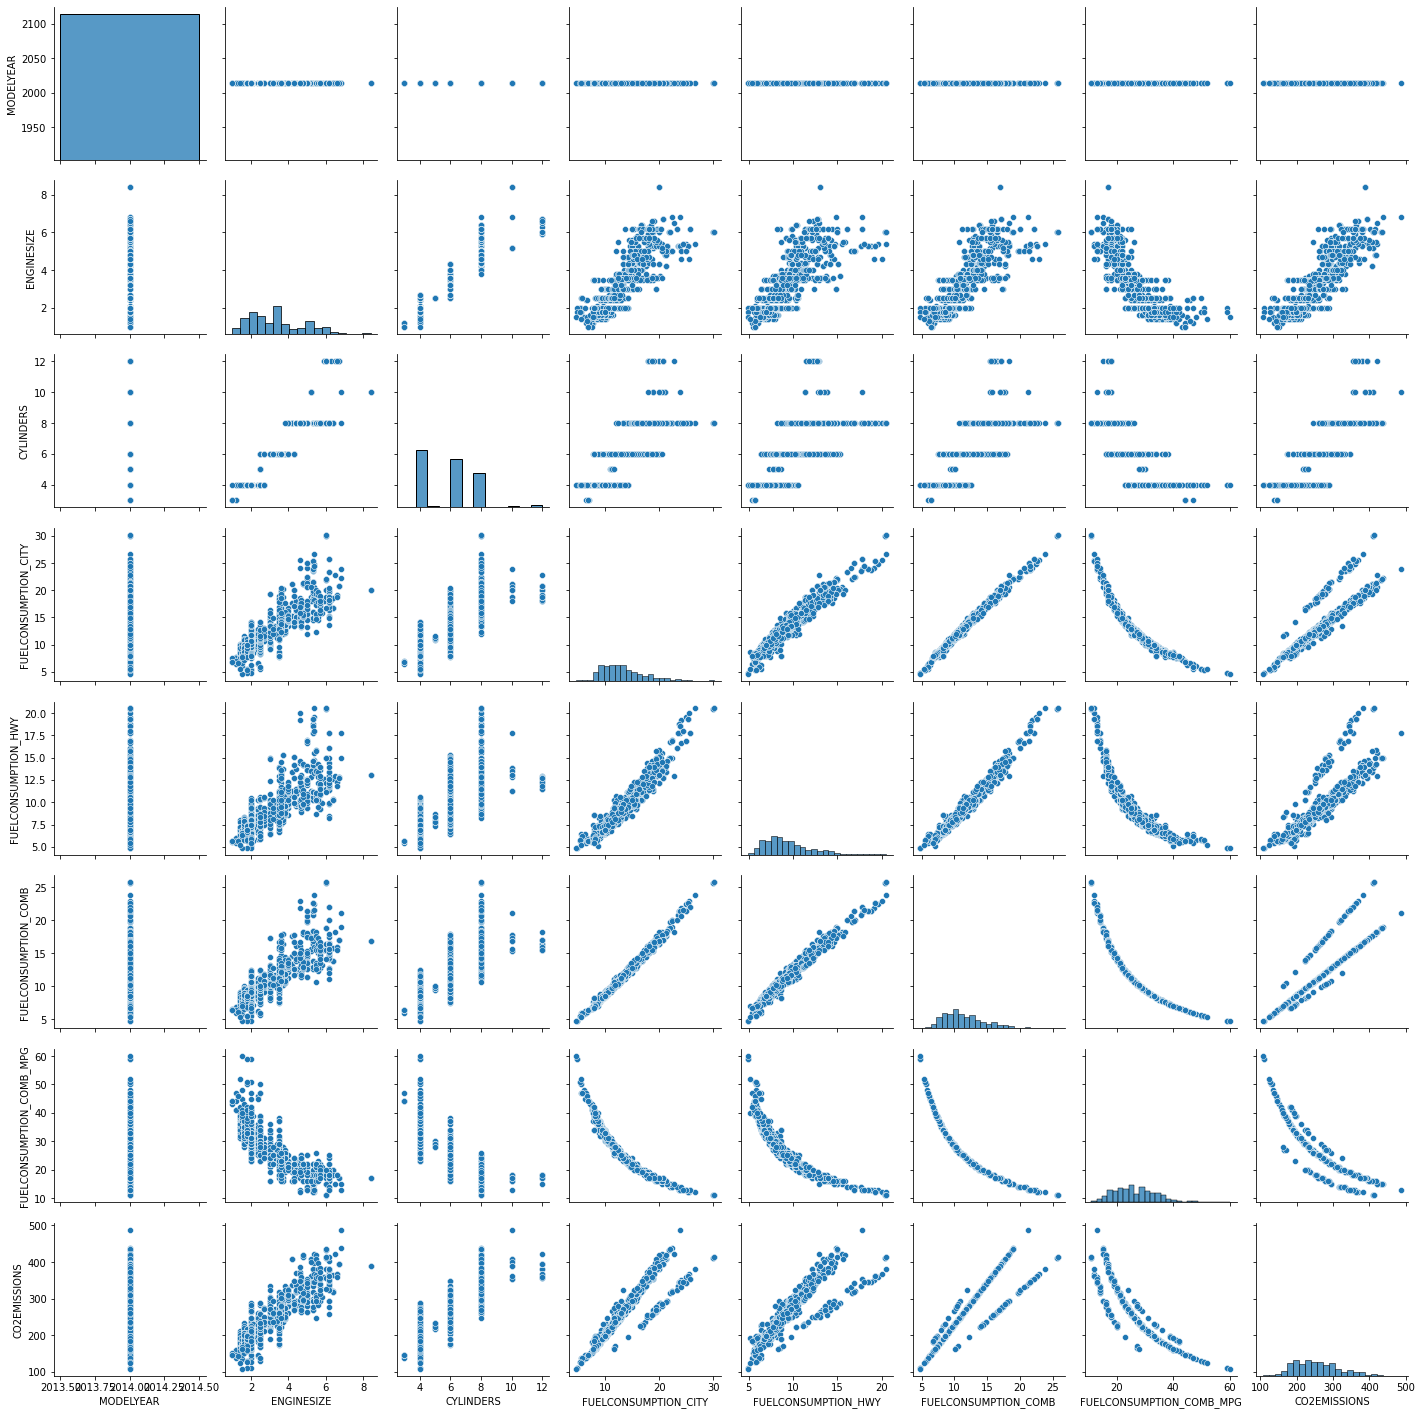

In [ ]:
# seu código

sns.pairplot(df)
plt.plot()

# Exercício. Modelo Regressão Simples

Crie um modelo de regressão simples para estimar valores `CO2EMISSIONS` com base nos dados de consumo combinado dos veículos `FUELCONSUMPTION_COMB`. Encontre os coeficientes, seus p-values, e o R2 do modelo. 


In [ ]:
# seu código
import statsmodels.formula.api as sm

model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB', data=df)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4153.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:31:22   Log-Likelihood:                -5092.7
No. Observations:                1067   AIC:                         1.019e+04
Df Residuals:                    1065   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               68.3871 

# Exercício. Predição
A partir do seu modelo empregue a função `result.predict(x)` para estimar a emissão de gases por veículos que apresentam consumo de combustível com valores 4 e 28.



In [ ]:
# seu código

X_novo = pd.DataFrame()
X_novo['FUELCONSUMPTION_COMB'] = [4,28]
result.predict(X_novo)

0    133.267015
1    522.546301
dtype: float64

# Exercício. Regressão Múltipla

Faça agora um modelo de regressão múltipla para estimar as emissões de CO2 a partir de `FUELCONSUMPTION_COMB` e `ENGINESIZE`. Em seguida faça a predição de emissões para um veículo com `FUELCONSUMPTION_COMB` = 10 e `ENGINESIZE` = 2. 

In [ ]:
# seu código

# define o modelo
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE', data=df)

# calcula o modelo e mostra os resultados
result = model.fit()
print(result.summary())

# faz a previsão
X_novo = pd.DataFrame()
X_novo['FUELCONSUMPTION_COMB'] = [10]
X_novo['ENGINESIZE'] = [2]

print(result.predict(X_novo))


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3220.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:31:22   Log-Likelihood:                -4898.4
No. Observations:                1067   AIC:                             9803.
Df Residuals:                    1064   BIC:                             9818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.3068 

# Exercício. Regressão com Atributos Categóricos (RESOLVIDO)

Faça agora um modelo de Regressão Múltipla adicionando o atributo categórico `VEHICLECLASS` ao modelo anterior. Sendo um atributo categórico o `statsmodel` fará automaticamente o *hot encode* desse atributo (o *hot encode* é uma importante técnica para tornar numérico atributos categóricos e é importante para uma série de modelos que requerem dados numéricos como a regressão. Se você não conhece, pesquise ou pergunte ao professor sobre esta transformação).



In [ ]:
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE + VEHICLECLASS', data=df)

result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     414.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:31:22   Log-Likelihood:                -4850.3
No. Observations:                1067   AIC:                             9737.
Df Residuals:                    1049   BIC:                             9826.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
result.params

Intercept                                   85.154742
VEHICLECLASS[T.FULL-SIZE]                   -1.177255
VEHICLECLASS[T.MID-SIZE]                    -4.589137
VEHICLECLASS[T.MINICOMPACT]                  0.737737
VEHICLECLASS[T.MINIVAN]                      0.870664
VEHICLECLASS[T.PICKUP TRUCK - SMALL]        27.164208
VEHICLECLASS[T.PICKUP TRUCK - STANDARD]      1.490240
VEHICLECLASS[T.SPECIAL PURPOSE VEHICLE]     18.117114
VEHICLECLASS[T.STATION WAGON - MID-SIZE]    -5.824881
VEHICLECLASS[T.STATION WAGON - SMALL]        7.469977
VEHICLECLASS[T.SUBCOMPACT]                   7.622019
VEHICLECLASS[T.SUV - SMALL]                 11.451534
VEHICLECLASS[T.SUV - STANDARD]               9.910910
VEHICLECLASS[T.TWO-SEATER]                  10.329937
VEHICLECLASS[T.VAN - CARGO]                 13.088594
VEHICLECLASS[T.VAN - PASSENGER]             33.028659
FUELCONSUMPTION_COMB                         8.083254
ENGINESIZE                                  21.719247
dtype: float64